## Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation

In [ ]:
df = pd.read_csv("employee_data.csv", encoding='windows-1252')

In [ ]:
df.shape

(1470, 35)

In [ ]:
# handling missing value
missing_attrition = df[df['Attrition'].isnull()]
missing_attrition.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
12,13,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,1,...,3,80,1,11,4,2,5,4,1,2
18,19,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,1,...,3,80,2,7,6,3,7,7,0,7


In [ ]:
df = df.dropna(subset=['Attrition'])
df.shape

(1058, 35)

## Business Dashboard

In [ ]:
df['Education'] = df['Education'].map({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobInvolvement'] = df['JobInvolvement'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobSatisfaction'] = df['JobSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['PerformanceRating'] = df['PerformanceRating'].map({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['WorkLifeBalance'] = df['WorkLifeBalance'].map({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})

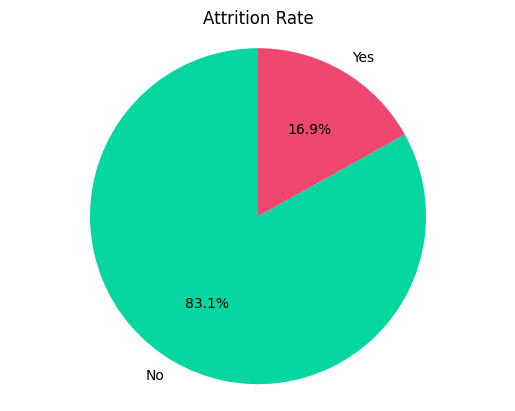

In [ ]:
df['Attrition'] = df['Attrition'].replace({1: 'Yes', 0: 'No'})

attrition_count = df['Attrition'].value_counts()
attrition_rate = attrition_count / len(df) * 100

fig, ax = plt.subplots()
ax.pie(attrition_count, labels=attrition_count.index, autopct='%1.1f%%', startangle=90, colors=['#06D6A0', '#EF476F'])
ax.axis('equal')
ax.set_title('Attrition Rate')
plt.show()

In [ ]:
attrition_counts = df['Attrition'].value_counts()
print("Active Employees (No) and Attrition Employees (Yes)")
print(attrition_counts)

Active Employees (No) and Attrition Employees (Yes)
No     879
Yes    179
Name: Attrition, dtype: int64


In [ ]:
def GroupAge(age):
  if age <= 35:
    return '18-35'
  elif age >= 36 and age <= 55:
    return '36-55'
  elif age > 55:
    return '>55'

df['Age'] = df['Age'].apply(GroupAge)

In [ ]:
df['EmployeeId'].count()

1058

In [ ]:
attritionByAgeGender = df[df['Attrition'] == 'Yes'].groupby(['Age', 'Gender'])['Attrition'].count().reset_index(name='Attrition_Yes_Count')
attritionByAge = df.groupby(['Age', 'Gender'])['Attrition'].count().reset_index(name='Total_Count')
result = attritionByAge.merge(attritionByAgeGender, on=['Age', 'Gender'], how='left').fillna(0)
result = result.drop(columns=['Total_Count'])  # Menghapus kolom Total_Count
result = result.sort_values(by='Attrition_Yes_Count', ascending=False)
result

,Age,Gender,Attrition_Yes_Count
1,18-35,Male,67
0,18-35,Female,52
3,36-55,Male,38
2,36-55,Female,16
4,>55,Female,3
5,>55,Male,3


In [ ]:
attritionByGender = df[df['Attrition'] == 'Yes'].groupby('Gender').agg({'Attrition': 'count'})
attritionByGender.columns = ['Attrition_Yes_Count']
attritionByGender

,Attrition_Yes_Count
Gender,
Female,71
Male,108


In [ ]:
attritionByEducationField = df[df['Attrition'] == 'Yes'].groupby('EducationField').agg({'Attrition': 'count'})
attritionByEducationField.columns = ['Attrition_Yes_Count']
attritionByEducationField = attritionByEducationField.sort_values(by='Attrition_Yes_Count', ascending=False)
attritionByEducationField

,Attrition_Yes_Count
EducationField,
Life Sciences,70
Medical,46
Marketing,26
Technical Degree,25
Other,10
Human Resources,2


In [ ]:
attritionByEducation = df[df['Attrition'] == 'Yes'].groupby('Education').agg({'Attrition': 'count'})
attritionByEducation.columns = ['Attrition_Yes_Count']
attritionByEducation

,Attrition_Yes_Count
Education,
Bachelor,76
Below College,26
College,31
Doctor,2
Master,44


In [ ]:
def GroupDistanceFromHome(distance):
  if distance <= 5:
    return 'Nearby'
  elif distance >= 6 and distance <= 15:
    return 'Far'
  else:
    return 'Very Far'

df['DistanceFromHome'] = df['DistanceFromHome'].apply(GroupDistanceFromHome)

attritionByDistanceFromHome = df.groupby(['Attrition', 'DistanceFromHome']).size().unstack(fill_value=0)
attrition_yes_data = attritionByDistanceFromHome.loc['Yes']
attrition_yes_data_df = attrition_yes_data.reset_index().rename_axis(None, axis=1)
attrition_yes_data_df.columns = ['DistanceFromHome', 'Count']
attrition_yes_data_df

,DistanceFromHome,Count
0,Far,58
1,Nearby,72
2,Very Far,49


In [ ]:
attritionByMaritalStatus = df[df['Attrition'] == 'Yes'].groupby('MaritalStatus').agg({'Attrition': 'count'})
attritionByMaritalStatus.columns = ['Attrition_Yes_Count']
attritionByMaritalStatus

,Attrition_Yes_Count
MaritalStatus,
Divorced,23
Married,62
Single,94


In [ ]:
attritionByDepartmentGender = df[df['Attrition'] == 'Yes'].groupby(['Department', 'Gender']).agg({'Attrition': 'count'})
attritionByDepartmentGender.columns = ['Attrition_Yes_Count']
attritionByDepartmentGender = attritionByDepartmentGender.sort_values(by='Attrition_Yes_Count', ascending=False)
attritionByDepartmentGender

Attrition_Yes_Count
Department             Gender                     
Research & Development Male                     70
                       Female                   37
Sales                  Male                     35
                       Female                   31
Human Resources        Female                    3
                       Male                      3

In [ ]:
attritionByBusinessTravelGender = df[df['Attrition'] == 'Yes'].groupby(['BusinessTravel', 'Gender']).agg({'Attrition': 'count'})
attritionByBusinessTravelGender.columns = ['Attrition_Yes_Count']
attritionByBusinessTravelGender = attritionByBusinessTravelGender.sort_values(by='Attrition_Yes_Count', ascending=False)
attritionByBusinessTravelGender

Attrition_Yes_Count
BusinessTravel    Gender                     
Travel_Rarely     Male                     73
                  Female                   44
Travel_Frequently Male                     27
                  Female                   24
Non-Travel        Male                      8
                  Female                    3

In [ ]:
attritionByJobLevelGender = df[df['Attrition'] == 'Yes'].groupby(['JobLevel', 'Gender']).agg({'Attrition': 'count'})
attritionByJobLevelGender.columns = ['Attrition_Yes_Count']
attritionByJobLevelGender

Attrition_Yes_Count
JobLevel Gender                     
1        Female                   43
         Male                     65
2        Female                   15
         Male                     22
3        Female                    9
         Male                     16
4        Female                    1
         Male                      3
5        Female                    3
         Male                      2

In [ ]:
attritionByJobRoleGender = df[df['Attrition'] == 'Yes'].groupby(['JobRole', 'Gender']).size().unstack(fill_value=0)
attritionByJobRoleGender = attritionByJobRoleGender.sort_values(by=['JobRole'], ascending=False)

attritionByJobRoleGender

Gender,Female,Male
JobRole,,
Sales Representative,13,12
Sales Executive,16,23
Research Scientist,15,23
Research Director,1,1
Manufacturing Director,3,4
Manager,2,3
Laboratory Technician,14,35
Human Resources,3,3
Healthcare Representative,4,4


In [ ]:
attritionByGender = df[df['Attrition'] == 'Yes'].groupby('Gender').agg({'Attrition': 'count'})
attritionByGender.columns = ['Attrition_Yes_Count']
attritionByGender

,Attrition_Yes_Count
Gender,
Female,71
Male,108


In [ ]:
attritionByOverTime = df[df['Attrition'] == 'Yes'].groupby('OverTime').agg({'Attrition': 'count'})
attritionByOverTime.columns = ['Attrition_Yes_Count']
attritionByOverTime

,Attrition_Yes_Count
OverTime,
No,81
Yes,98


In [ ]:
def working_years(years):
    if years < 1:
        return 'Junior'
    elif 1 <= years <= 3:
        return 'Middle'
    else:
        return 'Senior'

df['ExperienceCategory'] = df['TotalWorkingYears'].apply(working_years)

In [ ]:
attritionByTotalWorkingYears = df[df['Attrition'] == 'Yes'].groupby('ExperienceCategory').agg({'Attrition': 'count'})
attritionByTotalWorkingYears.columns = ['Attrition_Yes_Count']
attritionByTotalWorkingYears = attritionByTotalWorkingYears.sort_values(by='Attrition_Yes_Count', ascending=False)
attritionByTotalWorkingYears

,Attrition_Yes_Count
ExperienceCategory,
Senior,132
Middle,43
Junior,4


In [ ]:
attritionByJobSatisfaction = df[df['Attrition'] == 'Yes'].groupby('JobSatisfaction').agg({'Attrition': 'count'})
attritionByJobSatisfaction.columns = ['Attrition_Yes_Count']
attritionByJobSatisfaction

,Attrition_Yes_Count
JobSatisfaction,
High,62
Low,46
Medium,32
Very High,39


In [ ]:
attritionByEnvironmentSatisfaction = df[df['Attrition'] == 'Yes'].groupby('EnvironmentSatisfaction').agg({'Attrition': 'count'})
attritionByEnvironmentSatisfaction.columns = ['Attrition_Yes_Count']
attritionByEnvironmentSatisfaction

,Attrition_Yes_Count
EnvironmentSatisfaction,
High,47
Low,57
Medium,35
Very High,40


In [ ]:
attritionByRelationshipSatisfaction = df[df['Attrition'] == 'Yes'].groupby('RelationshipSatisfaction').agg({'Attrition': 'count'})
attritionByRelationshipSatisfaction.columns = ['Attrition_Yes_Count']
attritionByRelationshipSatisfaction

,Attrition_Yes_Count
RelationshipSatisfaction,
High,49
Low,46
Medium,32
Very High,52


In [ ]:
attritionByWorkLifeBalance = df[df['Attrition'] == 'Yes'].groupby('WorkLifeBalance').agg({'Attrition': 'count'})
attritionByWorkLifeBalance.columns = ['Attrition_Yes_Count']
attritionByWorkLifeBalance

,Attrition_Yes_Count
WorkLifeBalance,
Excellent,94
Good,45
Low,18
Outstanding,22


Monthly Income Categories:
- Low Income: Monthly income Less than or equal to 25% of the mean <= 2900 (usd).

- Medium Income: Monthly income between 25% and 75% of the mean 2900 (usd) to 8736 (usd).

- High Income: Monthly income more than 75% of the mean > 8736 (usd).

In [ ]:
def categorize_income(income):
    if income <= 2900:
        return 'Low Income'
    elif income <= 8736:
        return 'Medium Income'
    else:
        return 'High Income'

df['IncomeCategory'] = df['MonthlyIncome'].apply(categorize_income)

attritionByIncomeCategory = df[df['Attrition'] == 'Yes'].groupby('IncomeCategory').agg({'Attrition': 'count'})
attritionByIncomeCategory.columns = ['Attrition_Yes_Count']
attritionByIncomeCategory

,Attrition_Yes_Count
IncomeCategory,
High Income,26
Low Income,77
Medium Income,76


In [ ]:
averageMonthlyIncome = df['MonthlyIncome'].mean()
averageMonthlyIncome

6625.945179584121

In [ ]:
averageHourlyRate = df['HourlyRate'].mean()
averageHourlyRate

65.64366729678639

In [ ]:
averageMonthlyRate = df['MonthlyRate'].mean()
averageMonthlyRate

14267.281663516069

--- End of code ---